In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt


Read and Clean Data

In [2]:
data_path = '/Users/chenyihe/Desktop/Real-Estate-Regression-Python/Data Source.csv'
housing_prices = pd.read_csv(data_path)

# preview data
housing_prices.head
print(housing_prices)

# drop non-numeric columns
housing_prices_number = housing_prices.drop(columns=['Id', 'LotConfig', 'BldgType', 'Foundation','CentralAir','KitchenQual','PavedDrive','YearBuilt','YearRemodAdd','YrSold'])
housing_prices_number

        Id  SalePrice  LotArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  FullBath  \
0        1     208500     8450          856       856       854         2   
1        2     181500     9600         1262      1262         0         2   
2        3     223500    11250          920       920       866         2   
3        4     140000     9550          756       961       756         1   
4        5     250000    14260         1145      1145      1053         2   
...    ...        ...      ...          ...       ...       ...       ...   
1455  1456     175000     7917          953       953       694         2   
1456  1457     210000    13175         1542      2073         0         2   
1457  1458     266500     9042         1152      1188      1152         2   
1458  1459     142125     9717         1078      1078         0         1   
1459  1460     147500     9937         1256      1256         0         1   

      HalfBath  BedroomAbvGr  TotRmsAbvGrd  ...  PoolArea  LotConfig  \
0  

,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,208500,8450,856,856,854,2,1,3,8,0,2,0,61,0,0,0,0
1,181500,9600,1262,1262,0,2,0,3,6,1,2,298,0,0,0,0,0
2,223500,11250,920,920,866,2,1,3,6,1,2,0,42,0,0,0,0
3,140000,9550,756,961,756,1,0,3,7,1,3,0,35,272,0,0,0
4,250000,14260,1145,1145,1053,2,1,4,9,1,3,192,84,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,953,953,694,2,1,3,7,1,2,0,40,0,0,0,0
1456,210000,13175,1542,2073,0,2,0,3,7,2,2,349,0,0,0,0,0
1457,266500,9042,1152,1188,1152,2,0,4,9,2,1,0,60,0,0,0,0
1458,142125,9717,1078,1078,0,1,0,2,5,0,1,366,0,112,0,0,0


Explore Data (correlations, scatterplots)

           SalePrice        LotArea  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count    1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean   180921.195890   10516.828082  1057.429452  1162.626712   346.992466   
std     79442.502883    9981.264932   438.705324   386.587738   436.528436   
min     34900.000000    1300.000000     0.000000   334.000000     0.000000   
25%    129975.000000    7553.500000   795.750000   882.000000     0.000000   
50%    163000.000000    9478.500000   991.500000  1087.000000     0.000000   
75%    214000.000000   11601.500000  1298.250000  1391.250000   728.000000   
max    755000.000000  215245.000000  6110.000000  4692.000000  2065.000000   

          FullBath     HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean      1.565068     0.382877      2.866438      6.517808     0.613014   
std       0.550916     0.502885      0.815778      1.625393     0.644

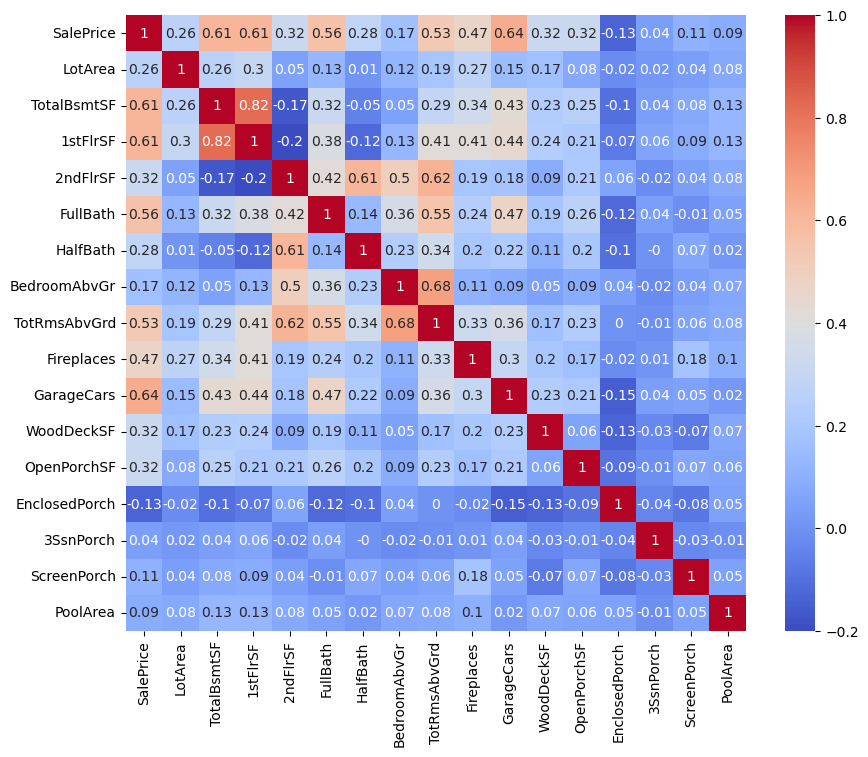

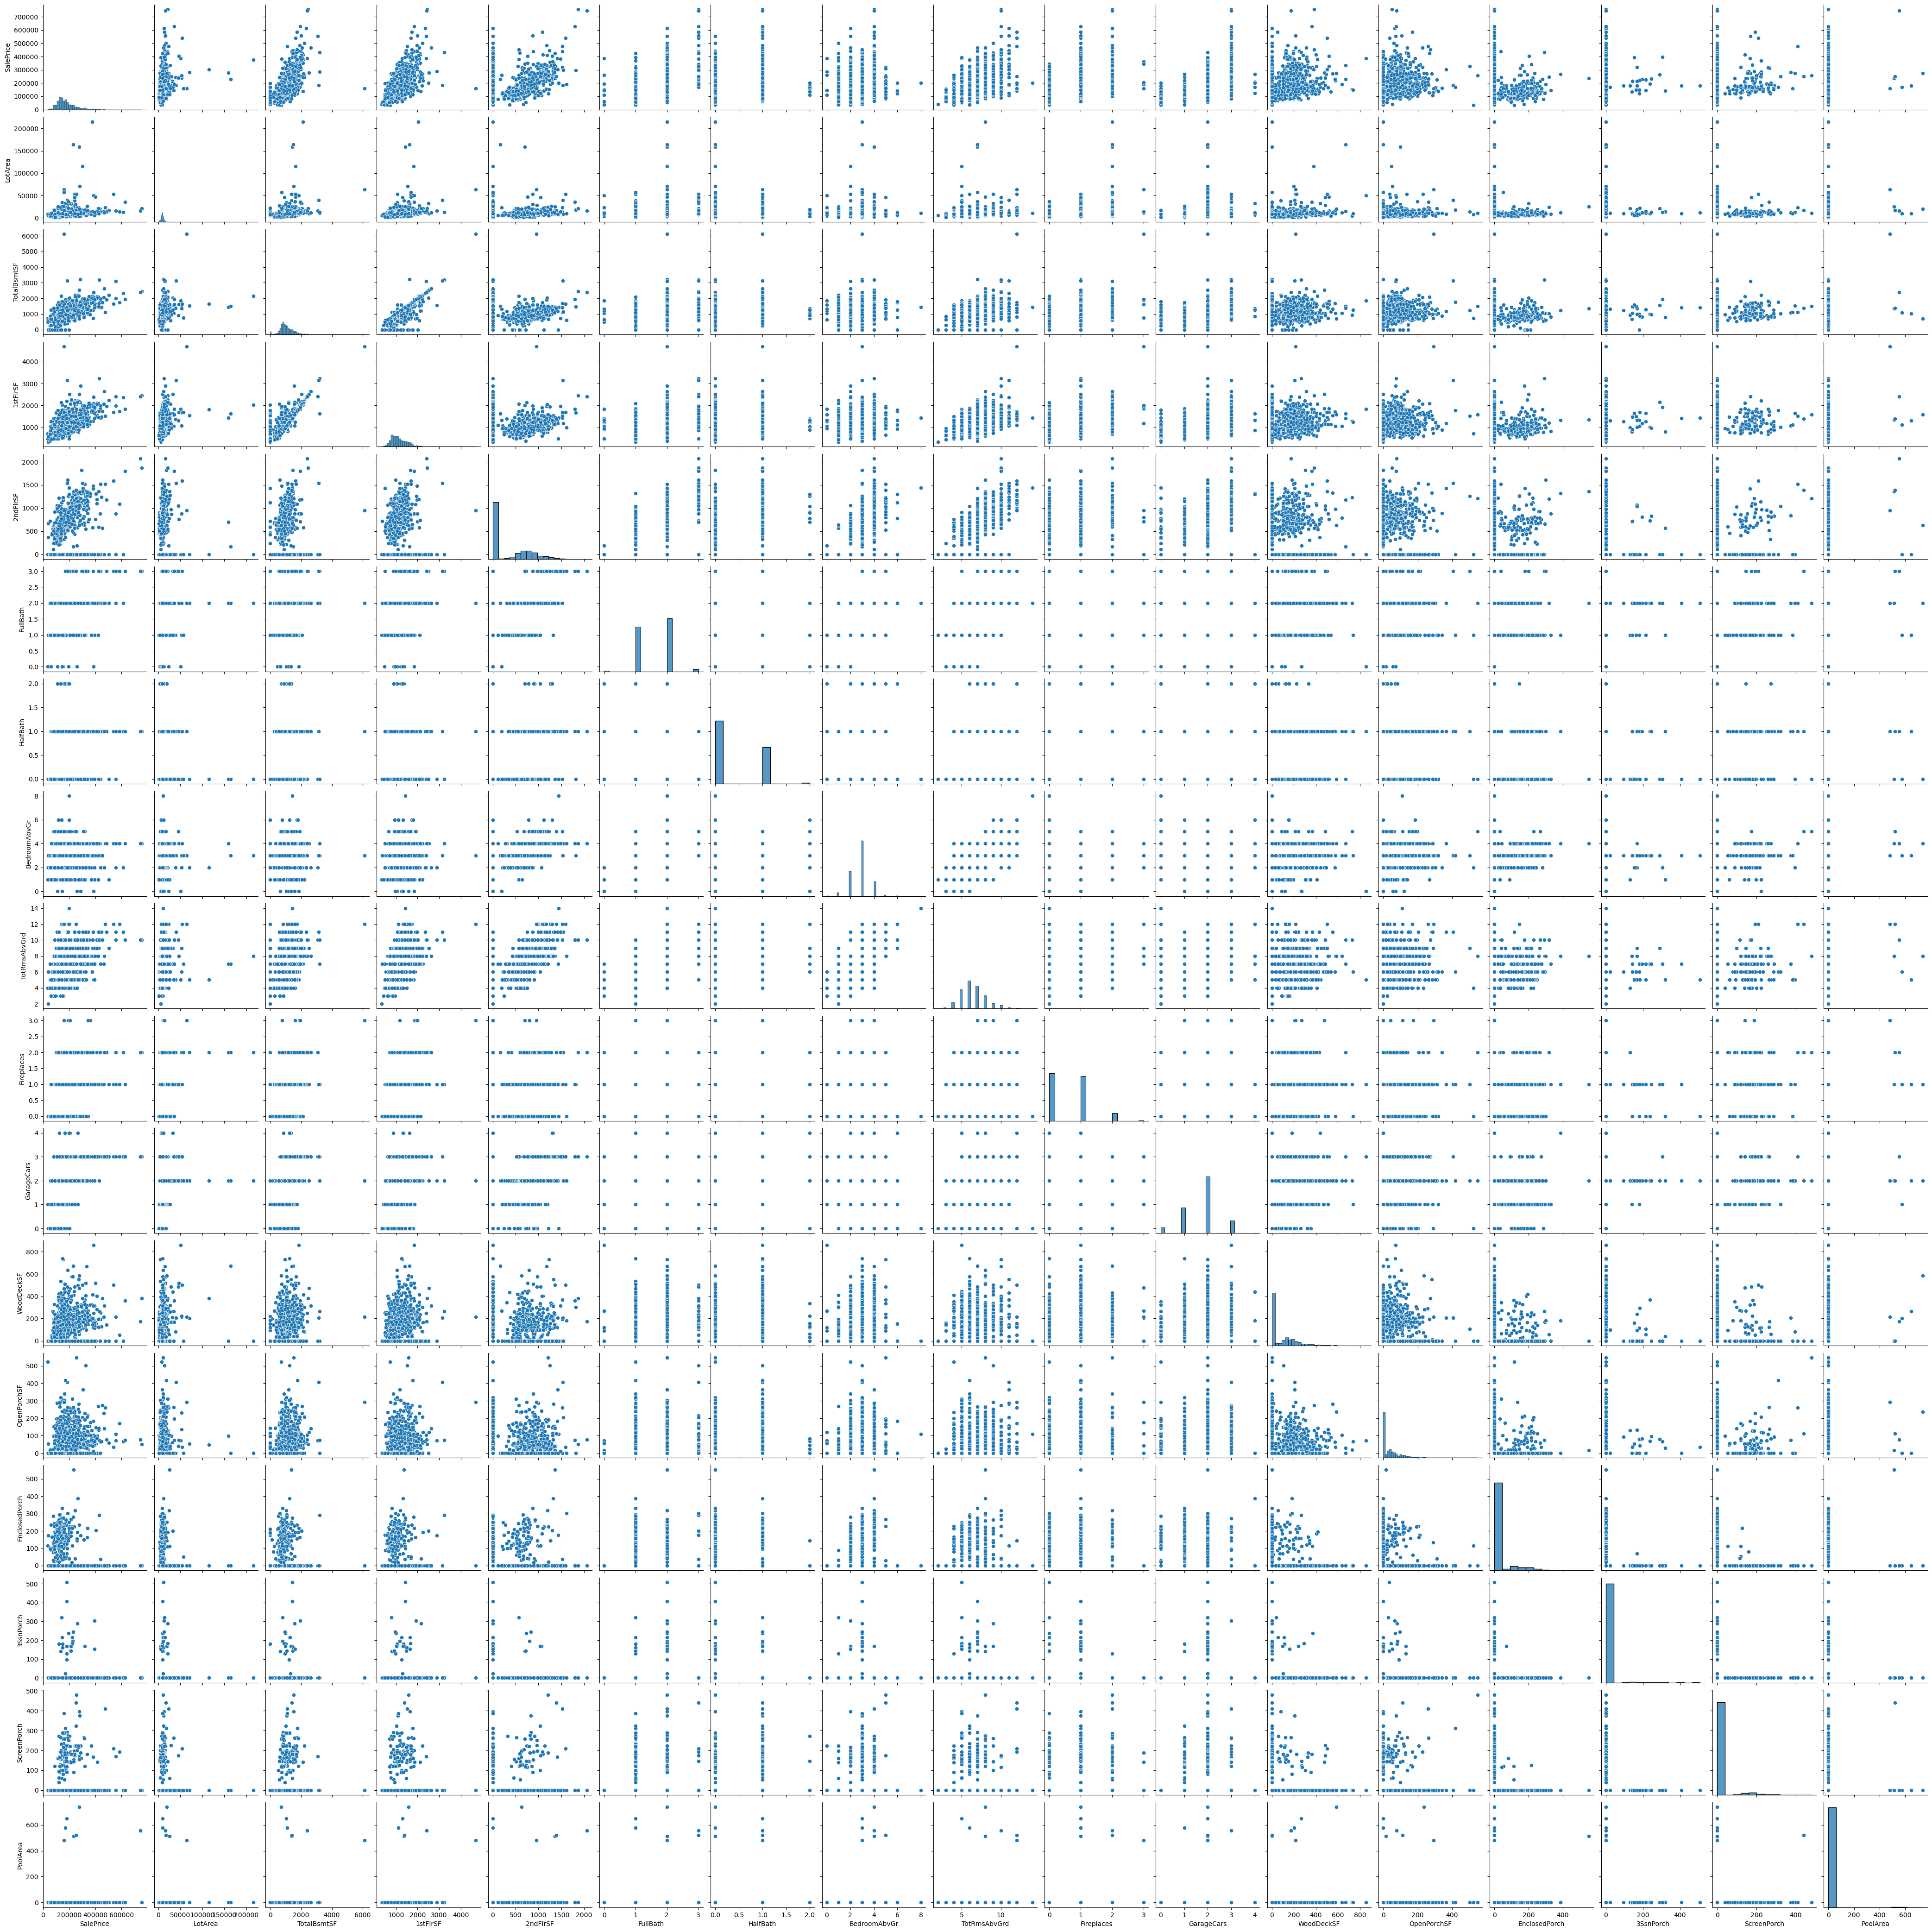

In [3]:
# Display summary statistics for numeric variables
print(housing_prices_number.describe())

# Compute correlations
cormat = housing_prices_number.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

# Create scatterplot matrix
sns.pairplot(housing_prices_number.iloc[:,:17])
plt.show()

Fit the Full Regression Model Using Only the Numeric Explanatory Variables

In [4]:
# Fit full regression
X = housing_prices_number.drop(columns=['SalePrice'])
y = housing_prices['SalePrice']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

# Display regression summary
print(fullreg.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     235.0
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:16:37   Log-Likelihood:                -17608.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1443   BIC:                         3.534e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8934.1843   5751.913     -1.553

Calculate Variance Inflation Factors (VIF) for full model

In [5]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)


         Variable        VIF
0           const  27.294673
1         LotArea   1.159111
2     TotalBsmtSF   3.274115
3        1stFlrSF   5.459137
4        2ndFlrSF   4.550552
5        FullBath   2.019604
6        HalfBath   1.857218
7    BedroomAbvGr   2.057734
8    TotRmsAbvGrd   4.294664
9      Fireplaces   1.446706
10     GarageCars   1.625979
11     WoodDeckSF   1.157176
12    OpenPorchSF   1.179928
13  EnclosedPorch   1.116303
14      3SsnPorch   1.013016
15    ScreenPorch   1.077447
16       PoolArea   1.057308


Create function for automated Forward / Backward model selection

In [6]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


Automated Variable Selection

In [7]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

Add  const with p-value 0.0000
Add  GarageCars with p-value 0.0000
Add  TotalBsmtSF with p-value 0.0000
Add  2ndFlrSF with p-value 0.0000
Add  1stFlrSF with p-value 0.0000
Add  BedroomAbvGr with p-value 0.0000
Add  WoodDeckSF with p-value 0.0000
Add  FullBath with p-value 0.0000
Add  Fireplaces with p-value 0.0000
Add  HalfBath with p-value 0.0006
resulting features:
['const', 'GarageCars', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'BedroomAbvGr', 'WoodDeckSF', 'FullBath', 'Fireplaces', 'HalfBath']


In [8]:
# Fit stepwise regression
X = housing_prices_number[['GarageCars', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'BedroomAbvGr', 'WoodDeckSF','FullBath','Fireplaces','HalfBath']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.1
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:16:37   Log-Likelihood:                -17620.
No. Observations:                1460   AIC:                         3.526e+04
Df Residuals:                    1450   BIC:                         3.531e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5508.2061   5318.393     -1.036   

In [9]:
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)


       Variable        VIF
0         const  23.056782
1    GarageCars   1.604528
2   TotalBsmtSF   3.180693
3      2ndFlrSF   3.058062
4      1stFlrSF   4.079623
5  BedroomAbvGr   1.544271
6    WoodDeckSF   1.107271
7      FullBath   1.927283
8    Fireplaces   1.384390
9      HalfBath   1.780088


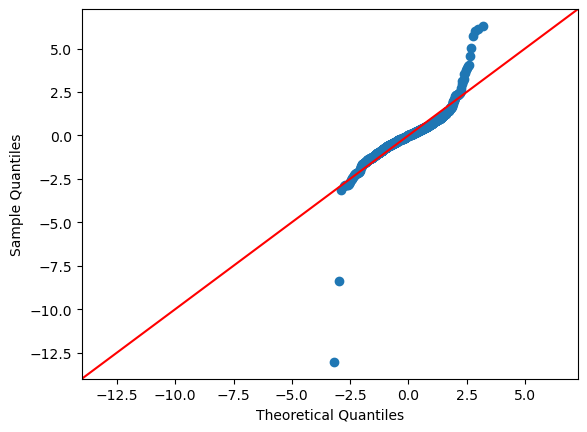

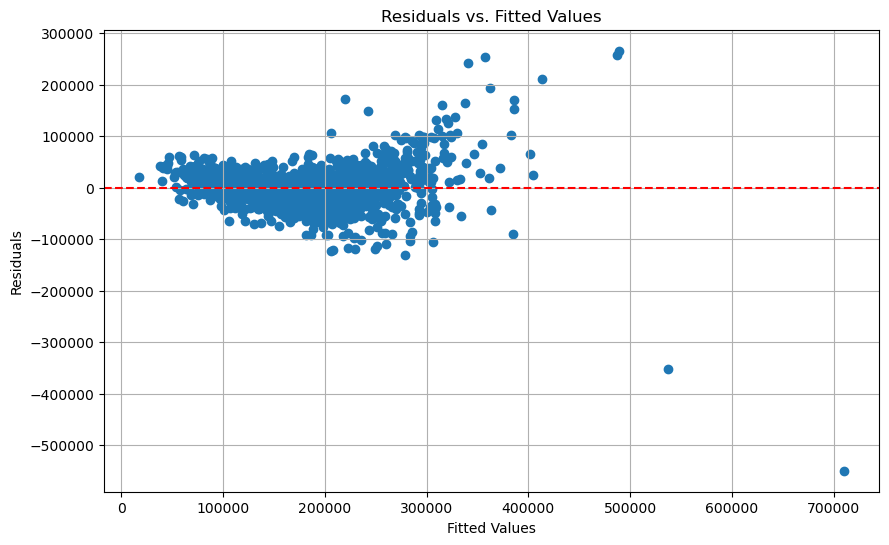

In [10]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

Try a log transformation and a square root transformation and compare the results

In [11]:
# log transformed regression
X = housing_prices_number[['GarageCars', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'BedroomAbvGr', 'WoodDeckSF','FullBath','Fireplaces','HalfBath']]
X = sm.add_constant(X)
logy = np.log(y)
logreg = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     478.9
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:16:37   Log-Likelihood:                 275.56
No. Observations:                1460   AIC:                            -531.1
Df Residuals:                    1450   BIC:                            -478.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.9926      0.025    435.103   

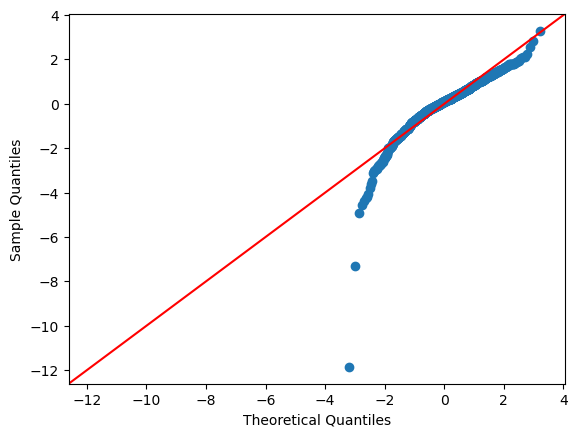

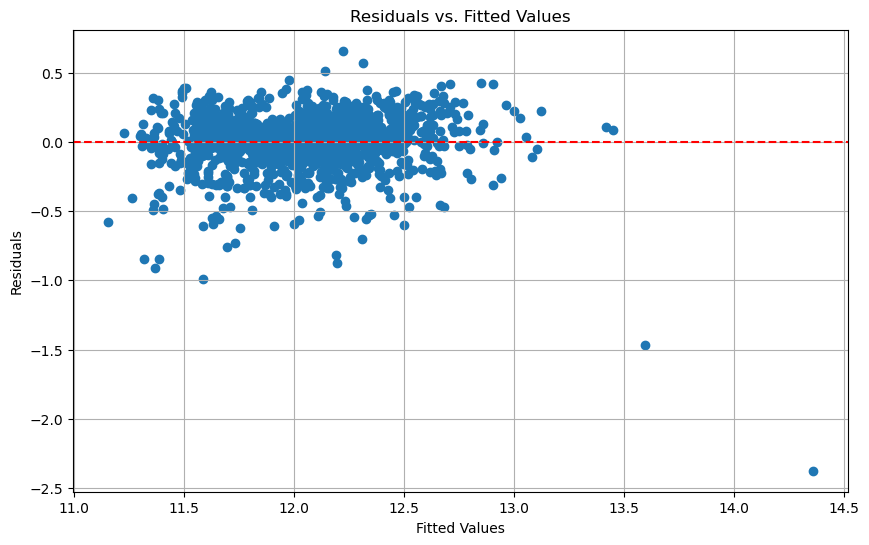

In [12]:
# Calculate residuals
residuals = logreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [13]:
# Square Root transformed regression
X = housing_prices_number[['GarageCars', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'BedroomAbvGr', 'WoodDeckSF','FullBath','Fireplaces','HalfBath']]
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     490.0
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:16:38   Log-Likelihood:                -7551.1
No. Observations:                1460   AIC:                         1.512e+04
Df Residuals:                    1450   BIC:                         1.518e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          202.6228      5.378     37.675   

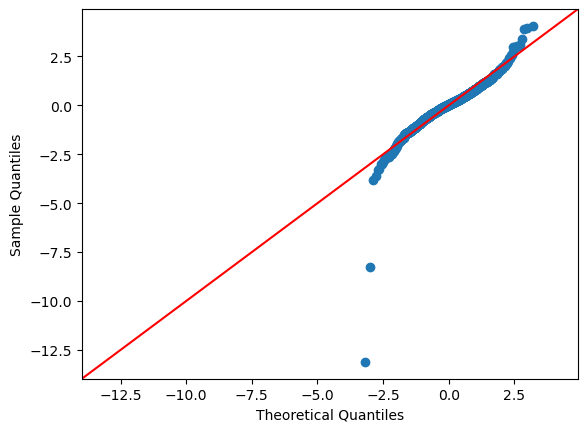

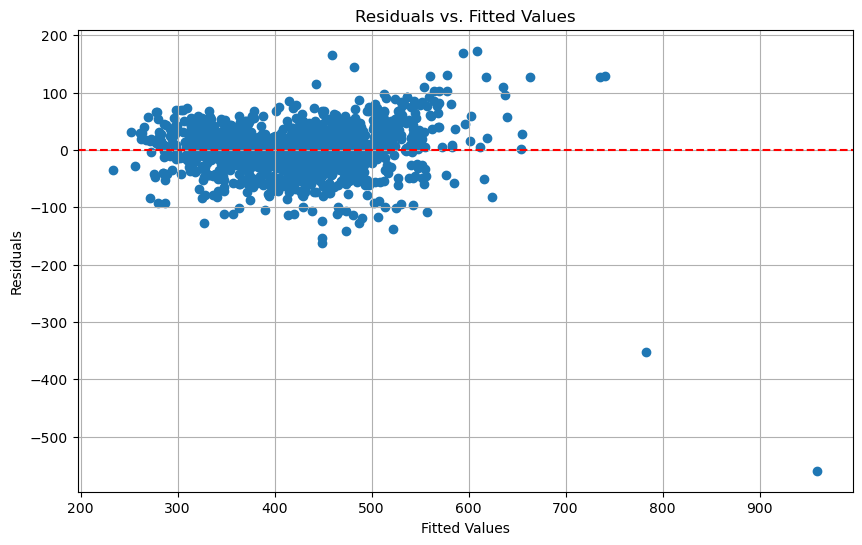

In [14]:
# Calculate residuals
residuals = sqrtreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

Examine the relationships between Make and Type of the car and price using boxplots

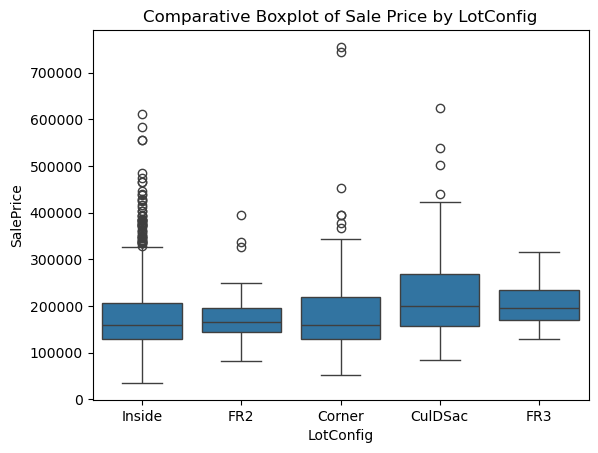

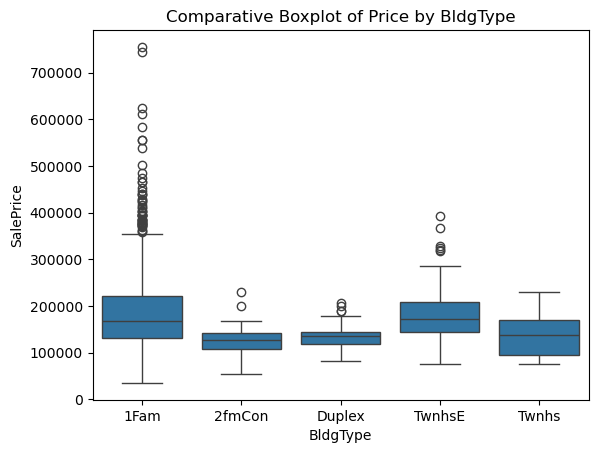

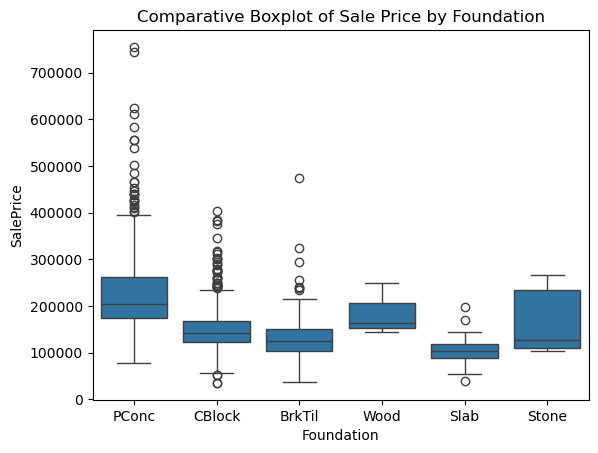

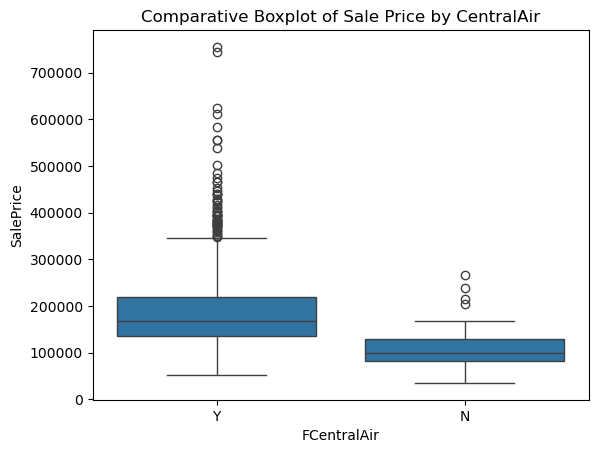

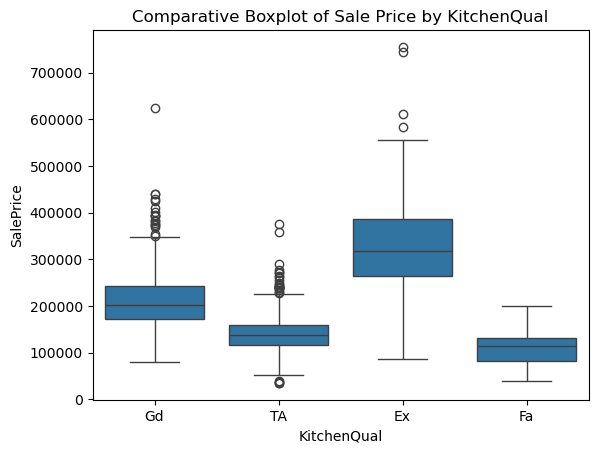

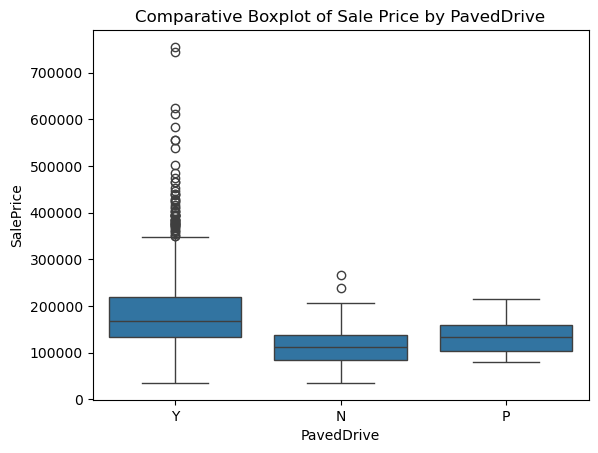

In [15]:
#Look at LotConfig vs Sale Price
sns.boxplot(x="LotConfig", y="SalePrice", data=housing_prices)

# Add labels and a title
plt.xlabel("LotConfig")
plt.ylabel("SalePrice")
plt.title("Comparative Boxplot of Sale Price by LotConfig")

# Show the plot
plt.show()

#Look at BldgType vs Price
sns.boxplot(x="BldgType", y="SalePrice", data=housing_prices)

# Add labels and a title
plt.xlabel("BldgType")
plt.ylabel("SalePrice")
plt.title("Comparative Boxplot of Price by BldgType")

# Show the plot
plt.show()

#Look at Foundation vs Sale Price
sns.boxplot(x="Foundation", y="SalePrice", data=housing_prices)

# Add labels and a title
plt.xlabel("Foundation")
plt.ylabel("SalePrice")
plt.title("Comparative Boxplot of Sale Price by Foundation")


# Show the plot
plt.show()

#Look at CentralAir vs Sale Price
sns.boxplot(x="CentralAir", y="SalePrice", data=housing_prices)

# Add labels and a title
plt.xlabel("FCentralAir")
plt.ylabel("SalePrice")
plt.title("Comparative Boxplot of Sale Price by CentralAir")


# Show the plot
plt.show()


#Look at KitchenQual vs Sale Price
sns.boxplot(x="KitchenQual", y="SalePrice", data=housing_prices)

# Add labels and a title
plt.xlabel("KitchenQual")
plt.ylabel("SalePrice")
plt.title("Comparative Boxplot of Sale Price by KitchenQual")


# Show the plot
plt.show()

#Look at PavedDrive vs Sale Price
sns.boxplot(x="PavedDrive", y="SalePrice", data=housing_prices)

# Add labels and a title
plt.xlabel("PavedDrive")
plt.ylabel("SalePrice")
plt.title("Comparative Boxplot of Sale Price by PavedDrive")


# Show the plot
plt.show()

In [16]:
# log transformed regression including categorical variables
X = housing_prices[['LotArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','LotConfig','BldgType','Foundation','CentralAir','KitchenQual','PavedDrive']]
X = pd.get_dummies(X, columns=['LotConfig','BldgType','Foundation','CentralAir','KitchenQual','PavedDrive'], drop_first=True, dtype='float')
X = sm.add_constant(X)
logy = np.log(y)
logreg2 = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     191.1
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:16:39   Log-Likelihood:                 538.93
No. Observations:                1460   AIC:                            -1006.
Df Residuals:                    1424   BIC:                            -815.6
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.0755      0.04

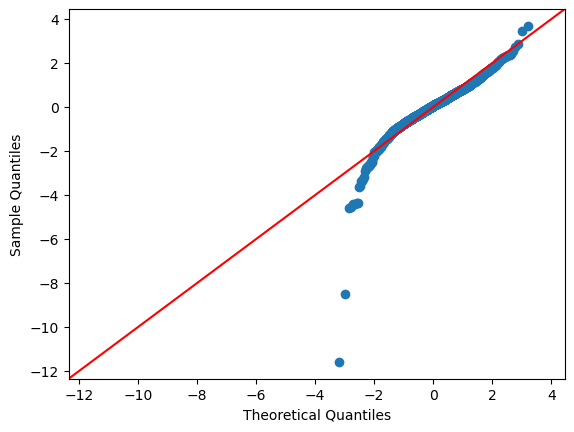

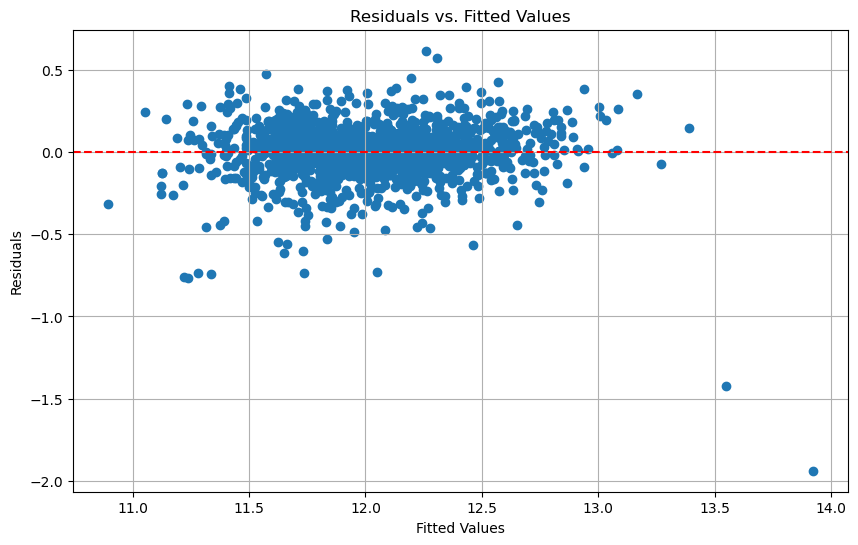

In [17]:
# Calculate residuals
residuals = logreg2.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg2.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [18]:
selected_features_LogCat  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features_LogCat)

Add  const with p-value 0.0000
Add  GarageCars with p-value 0.0000
Add  TotalBsmtSF with p-value 0.0000
Add  2ndFlrSF with p-value 0.0000
Add  KitchenQual_TA with p-value 0.0000
Add  1stFlrSF with p-value 0.0000
Add  KitchenQual_Gd with p-value 0.0000
Add  KitchenQual_Fa with p-value 0.0000
Add  Foundation_PConc with p-value 0.0000
Add  Fireplaces with p-value 0.0000
Add  LotConfig_CulDSac with p-value 0.0000
Add  WoodDeckSF with p-value 0.0000
Add  CentralAir_Y with p-value 0.0002
Add  BedroomAbvGr with p-value 0.0007
Add  BldgType_TwnhsE with p-value 0.0006
Add  FullBath with p-value 0.0017
Add  BldgType_Twnhs with p-value 0.0028
Add  BldgType_Duplex with p-value 0.0037
Add  ScreenPorch with p-value 0.0054
Add  LotArea with p-value 0.0089
resulting features:
['const', 'GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'KitchenQual_TA', '1stFlrSF', 'KitchenQual_Gd', 'KitchenQual_Fa', 'Foundation_PConc', 'Fireplaces', 'LotConfig_CulDSac', 'WoodDeckSF', 'CentralAir_Y', 'BedroomAbvGr', 'BldgType_T

In [19]:
# log transformed regression including categorical variables
# drop BedroomAG, TotRmsAbvGrd, OpenPorchSF, EnclosedPorchLot, 3SsnPorch, lot, BldgType, and Foundation
X = housing_prices[['LotArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','HalfBath','Fireplaces','GarageCars','WoodDeckSF','ScreenPorch','PoolArea','CentralAir','KitchenQual','PavedDrive']]
X = pd.get_dummies(X, columns=['CentralAir','KitchenQual','PavedDrive'], drop_first=True, dtype='float')
X = sm.add_constant(X)
logy = np.log(y)
logreg3 = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     358.9
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:16:41   Log-Likelihood:                 476.52
No. Observations:                1460   AIC:                            -917.0
Df Residuals:                    1442   BIC:                            -821.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.1073      0.039    282.

In [20]:
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)


          Variable        VIF
0            const  73.241693
1          LotArea   1.169826
2      TotalBsmtSF   3.336953
3         1stFlrSF   4.007579
4         2ndFlrSF   2.653873
5         FullBath   2.084266
6         HalfBath   1.846128
7       Fireplaces   1.457222
8       GarageCars   1.756967
9       WoodDeckSF   1.146377
10     ScreenPorch   1.065284
11        PoolArea   1.048810
12    CentralAir_Y   1.280168
13  KitchenQual_Fa   1.717259
14  KitchenQual_Gd   4.659924
15  KitchenQual_TA   5.574497
16    PavedDrive_P   1.333413
17    PavedDrive_Y   1.597266


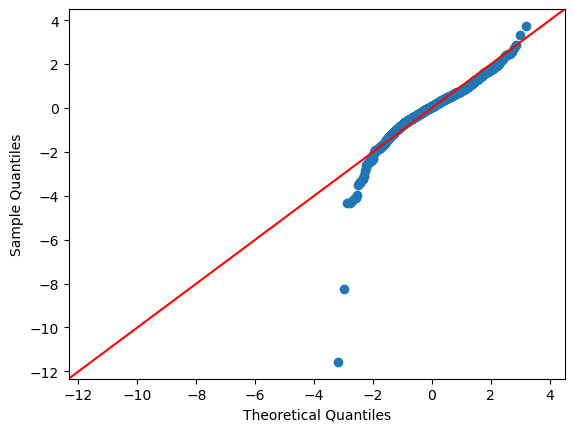

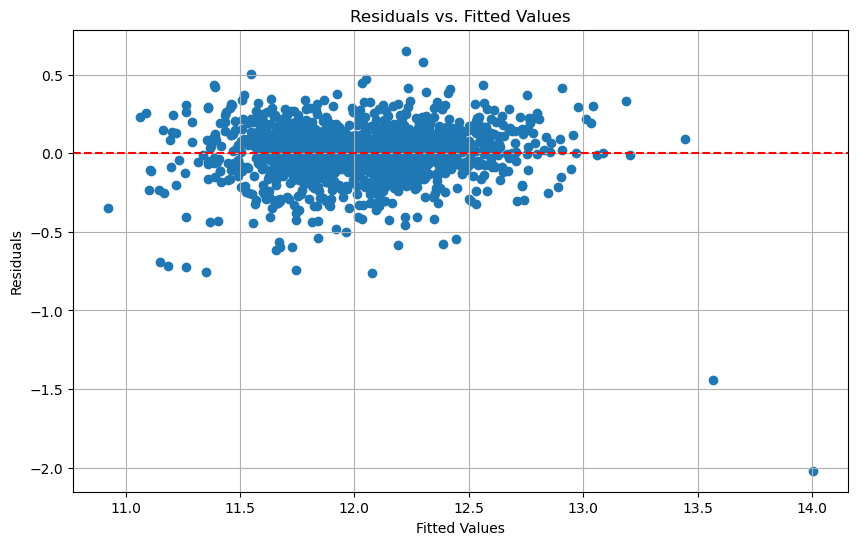

In [21]:
# Calculate residuals
residuals = logreg3.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg3.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [22]:
# make a prediction of the house price in the new data set 
# load new data

data_path = '/Users/chenyihe/Desktop/Real-Estate-Regression-Python/homes_for_sale.csv'
new_dat = pd.read_csv(data_path)

# Create X-matrix for regression (e.g., add / delete / modify any variables that were added / deleted / modified when creating the model)

Xnew = new_dat[['LotArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','HalfBath','Fireplaces','GarageCars','WoodDeckSF','ScreenPorch','PoolArea','CentralAir','KitchenQual','PavedDrive']]
Xnew = pd.get_dummies(Xnew, columns=['CentralAir','KitchenQual','PavedDrive'], drop_first=True,dtype='float')
Xnew = sm.add_constant(Xnew)

trained_columns = logreg3.model.exog_names
Xnew = Xnew.reindex(columns = trained_columns, fill_value=0)
# make predictions

predictions = logreg3.predict(Xnew)
print(predictions)

0    11.537081
1    11.756927
2    11.950683
3    12.524596
4    11.444824
dtype: float64


In [24]:
predicted_price = np.exp(predictions)
predicted_price

0    102445.000595
1    127634.601629
2    154922.965009
3    275019.039279
4     93416.534483
dtype: float64